In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw=pd.read_csv('updated_wilayah_pampat.csv', index_col=0)
raw.head()

,Tanggal,Kecamatan,pam,pat,elevasi,bulan,bulan_num,tahun,wilayah
0,2018-01-01,Kalideres,1154930,17945,5.352066,January,1,2018,Jakarta Barat
1,2018-01-01,Cengkareng,883655,13730,3.352066,January,1,2018,Jakarta Barat
2,2018-01-01,Tambora,128,2,4.352066,January,1,2018,Jakarta Barat
3,2018-01-01,Grogol Petamburan,373284,5800,4.352066,January,1,2018,Jakarta Barat
4,2018-01-01,Taman Sari,207430,3223,5.352066,January,1,2018,Jakarta Barat


In [3]:
raw.drop(columns=['Tanggal','bulan_num'],inplace=True)

In [4]:
df = raw[['tahun', 'bulan', 'wilayah', 'Kecamatan', 'pam', 'pat','elevasi']]
df.head()

,tahun,bulan,wilayah,Kecamatan,pam,pat,elevasi
0,2018,January,Jakarta Barat,Kalideres,1154930,17945,5.352066
1,2018,January,Jakarta Barat,Cengkareng,883655,13730,3.352066
2,2018,January,Jakarta Barat,Tambora,128,2,4.352066
3,2018,January,Jakarta Barat,Grogol Petamburan,373284,5800,4.352066
4,2018,January,Jakarta Barat,Taman Sari,207430,3223,5.352066


In [5]:
df

,tahun,bulan,wilayah,Kecamatan,pam,pat,elevasi
0,2018,January,Jakarta Barat,Kalideres,1154930,17945,5.352066
1,2018,January,Jakarta Barat,Cengkareng,883655,13730,3.352066
2,2018,January,Jakarta Barat,Tambora,128,2,4.352066
3,2018,January,Jakarta Barat,Grogol Petamburan,373284,5800,4.352066
4,2018,January,Jakarta Barat,Taman Sari,207430,3223,5.352066
...,...,...,...,...,...,...,...
1507,2020,December,Jakarta Selatan,Pesanggrahan,410806,6383,22.131616
1508,2020,December,Jakarta Selatan,Pasar Minggu,3304537,51345,39.131616
1509,2020,December,Jakarta Selatan,Jagakarsa,872457,13556,62.131616
1510,2020,December,Jakarta Selatan,Mampang Prapatan,1110973,17262,26.131616


## Splitting Data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns=['elevasi'])
y = df['elevasi']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.columns

Index(['tahun', 'bulan', 'wilayah', 'Kecamatan', 'pam', 'pat'], dtype='object')

## 1. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

In [11]:
transform = ColumnTransformer([
    ("encode", OneHotEncoder(), ['bulan','wilayah','Kecamatan'])
], remainder = 'passthrough')

In [12]:
poly = Pipeline([
    ("transform", transform),
    ("poly", PolynomialFeatures())
])

hype_DT = Pipeline([
    ("encode", transform),
    ("algo", DecisionTreeRegressor())
])

In [13]:
hype_DT = Pipeline([
    ("encode", transform),
    ("algo", DecisionTreeRegressor())
])

In [14]:
hype_DT.get_params()

{'memory': None,
 'steps': [('encode',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('encode',
                                    OneHotEncoder(categories='auto', drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='error',
                                                  sparse=True),
                                    ['bulan', 'wilayah', 'Kecamatan'])],
                     verbose=False)),
  ('algo',
   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
        

In [15]:
param_DT = {
    'algo__max_depth': [None, 3, 5, 7],
    'algo__min_samples_leaf': range(1, 10, 2),
    'algo__min_samples_split': range(2, 20, 2),
    'algo__max_features': [None, 'log2', 'sqrt']
}

In [16]:
DT_GS = GridSearchCV(hype_DT, param_DT, cv=3, verbose=False)

In [17]:
DT_GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encode',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encode',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                   

In [18]:
DT_GS.best_params_

{'algo__max_depth': None,
 'algo__max_features': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2}

In [19]:
model_DT = Pipeline([
    ("encode", transform),
    ("algo", DecisionTreeRegressor(max_depth=None, max_features=None, min_samples_leaf= 1, min_samples_split= 4))
])

In [20]:
model_DT.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encode',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['bulan', 'wilayah',
                                                   'Kecamatan'])],
                                   verbose=False)),
                ('algo',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='m

In [21]:
y_predDT = model_DT.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test, y_predDT)

0.9984934528157273

In [24]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

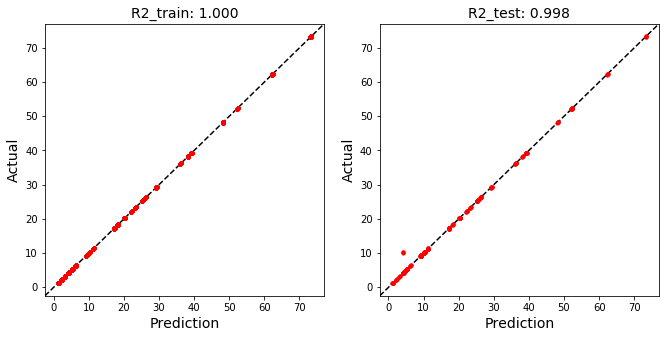

In [25]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_DT)

## 2. RandomForest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
hype_RF = Pipeline([
    ("encode", transform),
    ("algo", RandomForestRegressor())
])

In [28]:
hype_RF.get_params()

{'memory': None,
 'steps': [('encode',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('encode',
                                    OneHotEncoder(categories='auto', drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='error',
                                                  sparse=True),
                                    ['bulan', 'wilayah', 'Kecamatan'])],
                     verbose=False)),
  ('algo',
   RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         max_samples=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf

In [29]:
params_RF = {
    'algo__n_estimators': range(100, 200, 50),
    'algo__max_depth': [None, 3, 5, 7],
    'algo__min_samples_leaf': range(1, 10, 2),
    'algo__min_samples_split': range(2, 20, 4),
    'algo__max_features': ['auto', None, 'sqrt']
}

In [30]:
RF_gs = GridSearchCV(hype_RF, params_RF, cv=3, n_jobs=-1, verbose=False)

In [31]:
RF_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encode',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encode',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                   

In [32]:
RF_gs.best_params_

{'algo__max_depth': None,
 'algo__max_features': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 18,
 'algo__n_estimators': 150}

In [33]:
model_RF = Pipeline([
    ("encode", transform),
    ("algo", RandomForestRegressor(max_depth=None, max_features=None, min_samples_leaf= 1, min_samples_split= 18, n_estimators=150))
])

In [34]:
model_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encode',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['bulan', 'wilayah',
                                                   'Kecamatan'])],
                                   verbose=False)),
                ('algo',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0

In [35]:
y_predRF = model_RF.predict(X_test)

In [36]:
r2_score(y_test, y_predRF)

0.9991725554331533

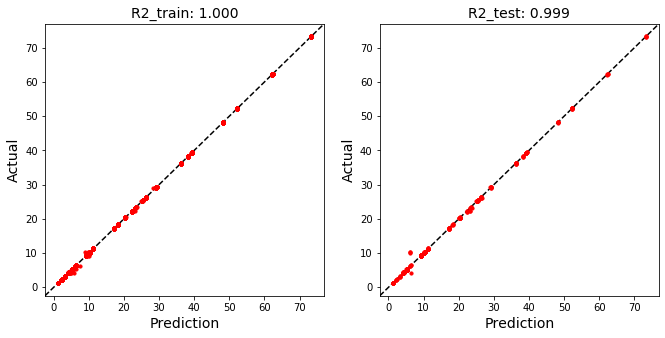

In [37]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)

## 3. Support Vector Regression

In [38]:
from sklearn.svm import SVR

In [39]:
hype_SVR = Pipeline([
    ("encode", transform),
    ("algo", SVR())
])

In [40]:
hype_SVR.get_params()

{'memory': None,
 'steps': [('encode',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('encode',
                                    OneHotEncoder(categories='auto', drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='error',
                                                  sparse=True),
                                    ['bulan', 'wilayah', 'Kecamatan'])],
                     verbose=False)),
  ('algo',
   SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
       kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))],
 'verbose': False,
 'encode': ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('encode',
           

In [41]:
params_SVR = {
    'algo__C': [1.0, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+0],
    'algo__gamma': ['scale',1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]
}

In [42]:
SVR_gs = GridSearchCV(hype_SVR, params_SVR, cv=3, n_jobs=-1, verbose=False)

In [43]:
SVR_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encode',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encode',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                   

In [44]:
SVR_gs.best_params_

{'algo__C': 100.0, 'algo__gamma': 0.01}

In [45]:
model_SVR = Pipeline([
    ("encode", transform),
    ("algo", SVR(C=100, gamma=0.01))
])

In [46]:
model_SVR.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encode',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['bulan', 'wilayah',
                                                   'Kecamatan'])],
                                   verbose=False)),
                ('algo',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=3, e

In [47]:
y_predSVR = model_SVR.predict(X_test)

In [48]:
r2_score(y_test, y_predSVR)

0.10121932090406105

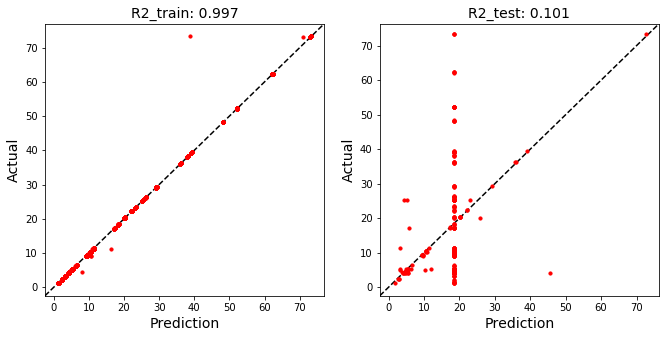

In [49]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_SVR)

## Evaluation

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
summary = pd.DataFrame()

In [52]:
summary['model'] = ['Decision Tree', 'Random Forest','Support Vector Regression']

In [53]:
summary['MAE'] = [mean_absolute_error(y_test, y_predDT), mean_absolute_error(y_test, y_predRF), mean_absolute_error(y_test, y_predSVR)]
summary['MSE'] = [mean_squared_error(y_test, y_predDT), mean_squared_error(y_test, y_predRF), mean_squared_error(y_test, y_predSVR)]
summary['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_predDT)), np.sqrt(mean_squared_error(y_test, y_predRF)),np.sqrt(mean_squared_error(y_test, y_predSVR)),]
summary['r2_score'] = [r2_score(y_test, y_predDT), r2_score(y_test, y_predRF), r2_score(y_test, y_predSVR)]

In [54]:
summary

,model,MAE,MSE,RMSE,r2_score
0,Decision Tree,0.060268,0.356548,0.597117,0.998493
1,Random Forest,0.098783,0.195828,0.442524,0.999173
2,Support Vector Regression,10.820020,212.710604,14.584602,0.101219


## Summary 

Model dengan r2_score paling baik adalah Random Forest dengan parameter sebagai berikut:
 'algo__max_depth': None,
 'algo__max_features': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 18,
 'algo__n_estimators': 150